In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Copy of EastWestAirlines.csv')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
num_col=[i for i in df.columns if df[i].dtype!='O']

In [6]:
num_col

['ID#',
 'Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll',
 'Award?']

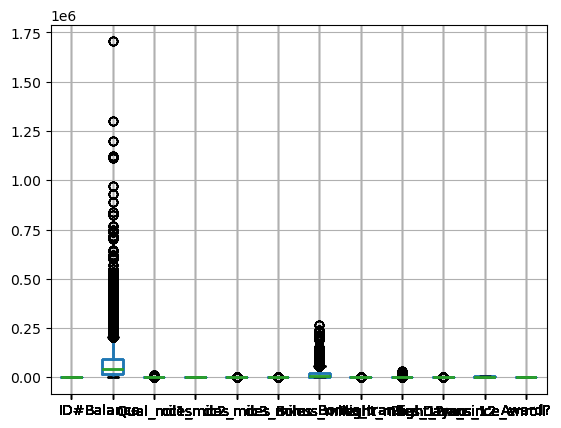

In [7]:
for i in num_col:
    df.boxplot(column=num_col)
plt.show()

Max Outlier is present in Balance column

In [8]:
per25=df['Balance'].quantile(0.25)
per25

18527.5

In [9]:
per75=df['Balance'].quantile(0.75)
per75

92404.0

In [10]:
iqr=per75-per25

In [11]:
iqr

73876.5

In [12]:
upper=per75+1.5*iqr
upper

203218.75

In [13]:
lower=per75-1.5*iqr
lower

-18410.75

In [14]:
df[df['Balance']>upper]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
24,25,205651,500,1,1,1,4025,21,700,4,7932,0
32,33,276571,0,4,1,1,42044,23,0,0,7872,0
43,44,619393,0,3,1,1,15008,14,0,0,7819,1
45,46,288865,967,1,1,1,23600,14,2000,4,6884,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3754,3777,221543,0,1,1,1,10300,5,200,3,3554,1
3756,3779,203353,0,1,1,1,14000,13,4000,8,3557,1
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1
3788,3811,374613,0,1,2,1,23592,31,5000,14,3463,1


In [15]:
df=df[df['Balance']<upper]

In [16]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


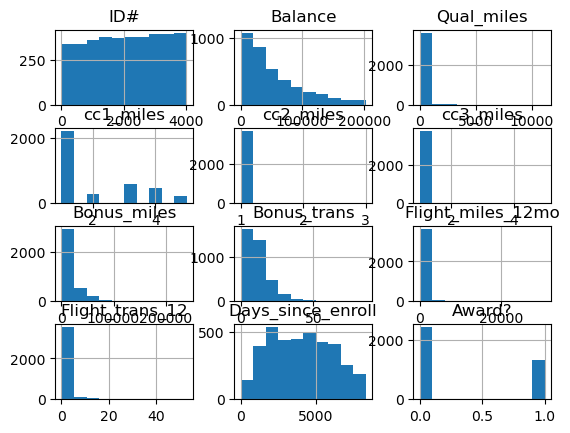

In [17]:
df.hist()
plt.show()

In [18]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [19]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3733.000000,3733.000000,3733.000000,3733.000000,3733.000000,3733.000000,3733.000000,3733.000000,3733.000000,3733.000000,3733.000000,3733.000000
mean,2068.951781,53831.927940,131.015001,1.986874,1.014733,1.012323,15328.525047,11.081704,401.579427,1.189928,4016.226895,0.353871
std,1154.566067,46937.887757,746.211543,1.327058,0.150196,0.196044,21336.284431,9.340672,1312.796731,3.451716,2045.970382,0.478234
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1087.000000,17481.000000,0.000000,1.000000,1.000000,1.000000,1100.000000,3.000000,0.000000,0.000000,2247.000000,0.000000
50%,2092.000000,38671.000000,0.000000,1.000000,1.000000,1.000000,6250.000000,11.000000,0.000000,0.000000,3939.000000,0.000000
75%,3074.000000,77540.000000,0.000000,3.000000,1.000000,1.000000,21559.000000,16.000000,232.000000,1.000000,5651.000000,1.000000
max,4021.000000,202636.000000,11148.000000,5.000000,3.000000,5.000000,240544.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3733 non-null   int64
 1   Balance            3733 non-null   int64
 2   Qual_miles         3733 non-null   int64
 3   cc1_miles          3733 non-null   int64
 4   cc2_miles          3733 non-null   int64
 5   cc3_miles          3733 non-null   int64
 6   Bonus_miles        3733 non-null   int64
 7   Bonus_trans        3733 non-null   int64
 8   Flight_miles_12mo  3733 non-null   int64
 9   Flight_trans_12    3733 non-null   int64
 10  Days_since_enroll  3733 non-null   int64
 11  Award?             3733 non-null   int64
dtypes: int64(12)
memory usage: 379.1 KB


In [21]:
import seaborn as sns

In [22]:
column=num_col
column

['ID#',
 'Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll',
 'Award?']

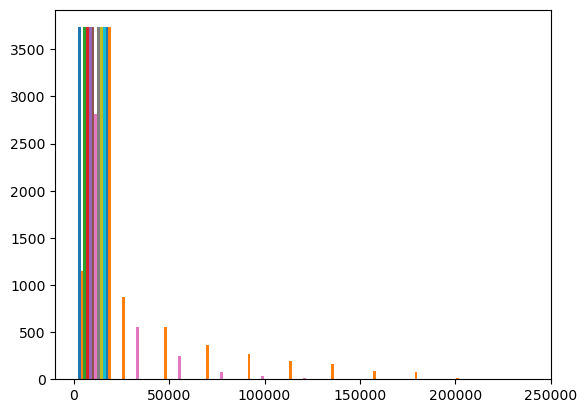

In [23]:
plt.hist(df,bins=11)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

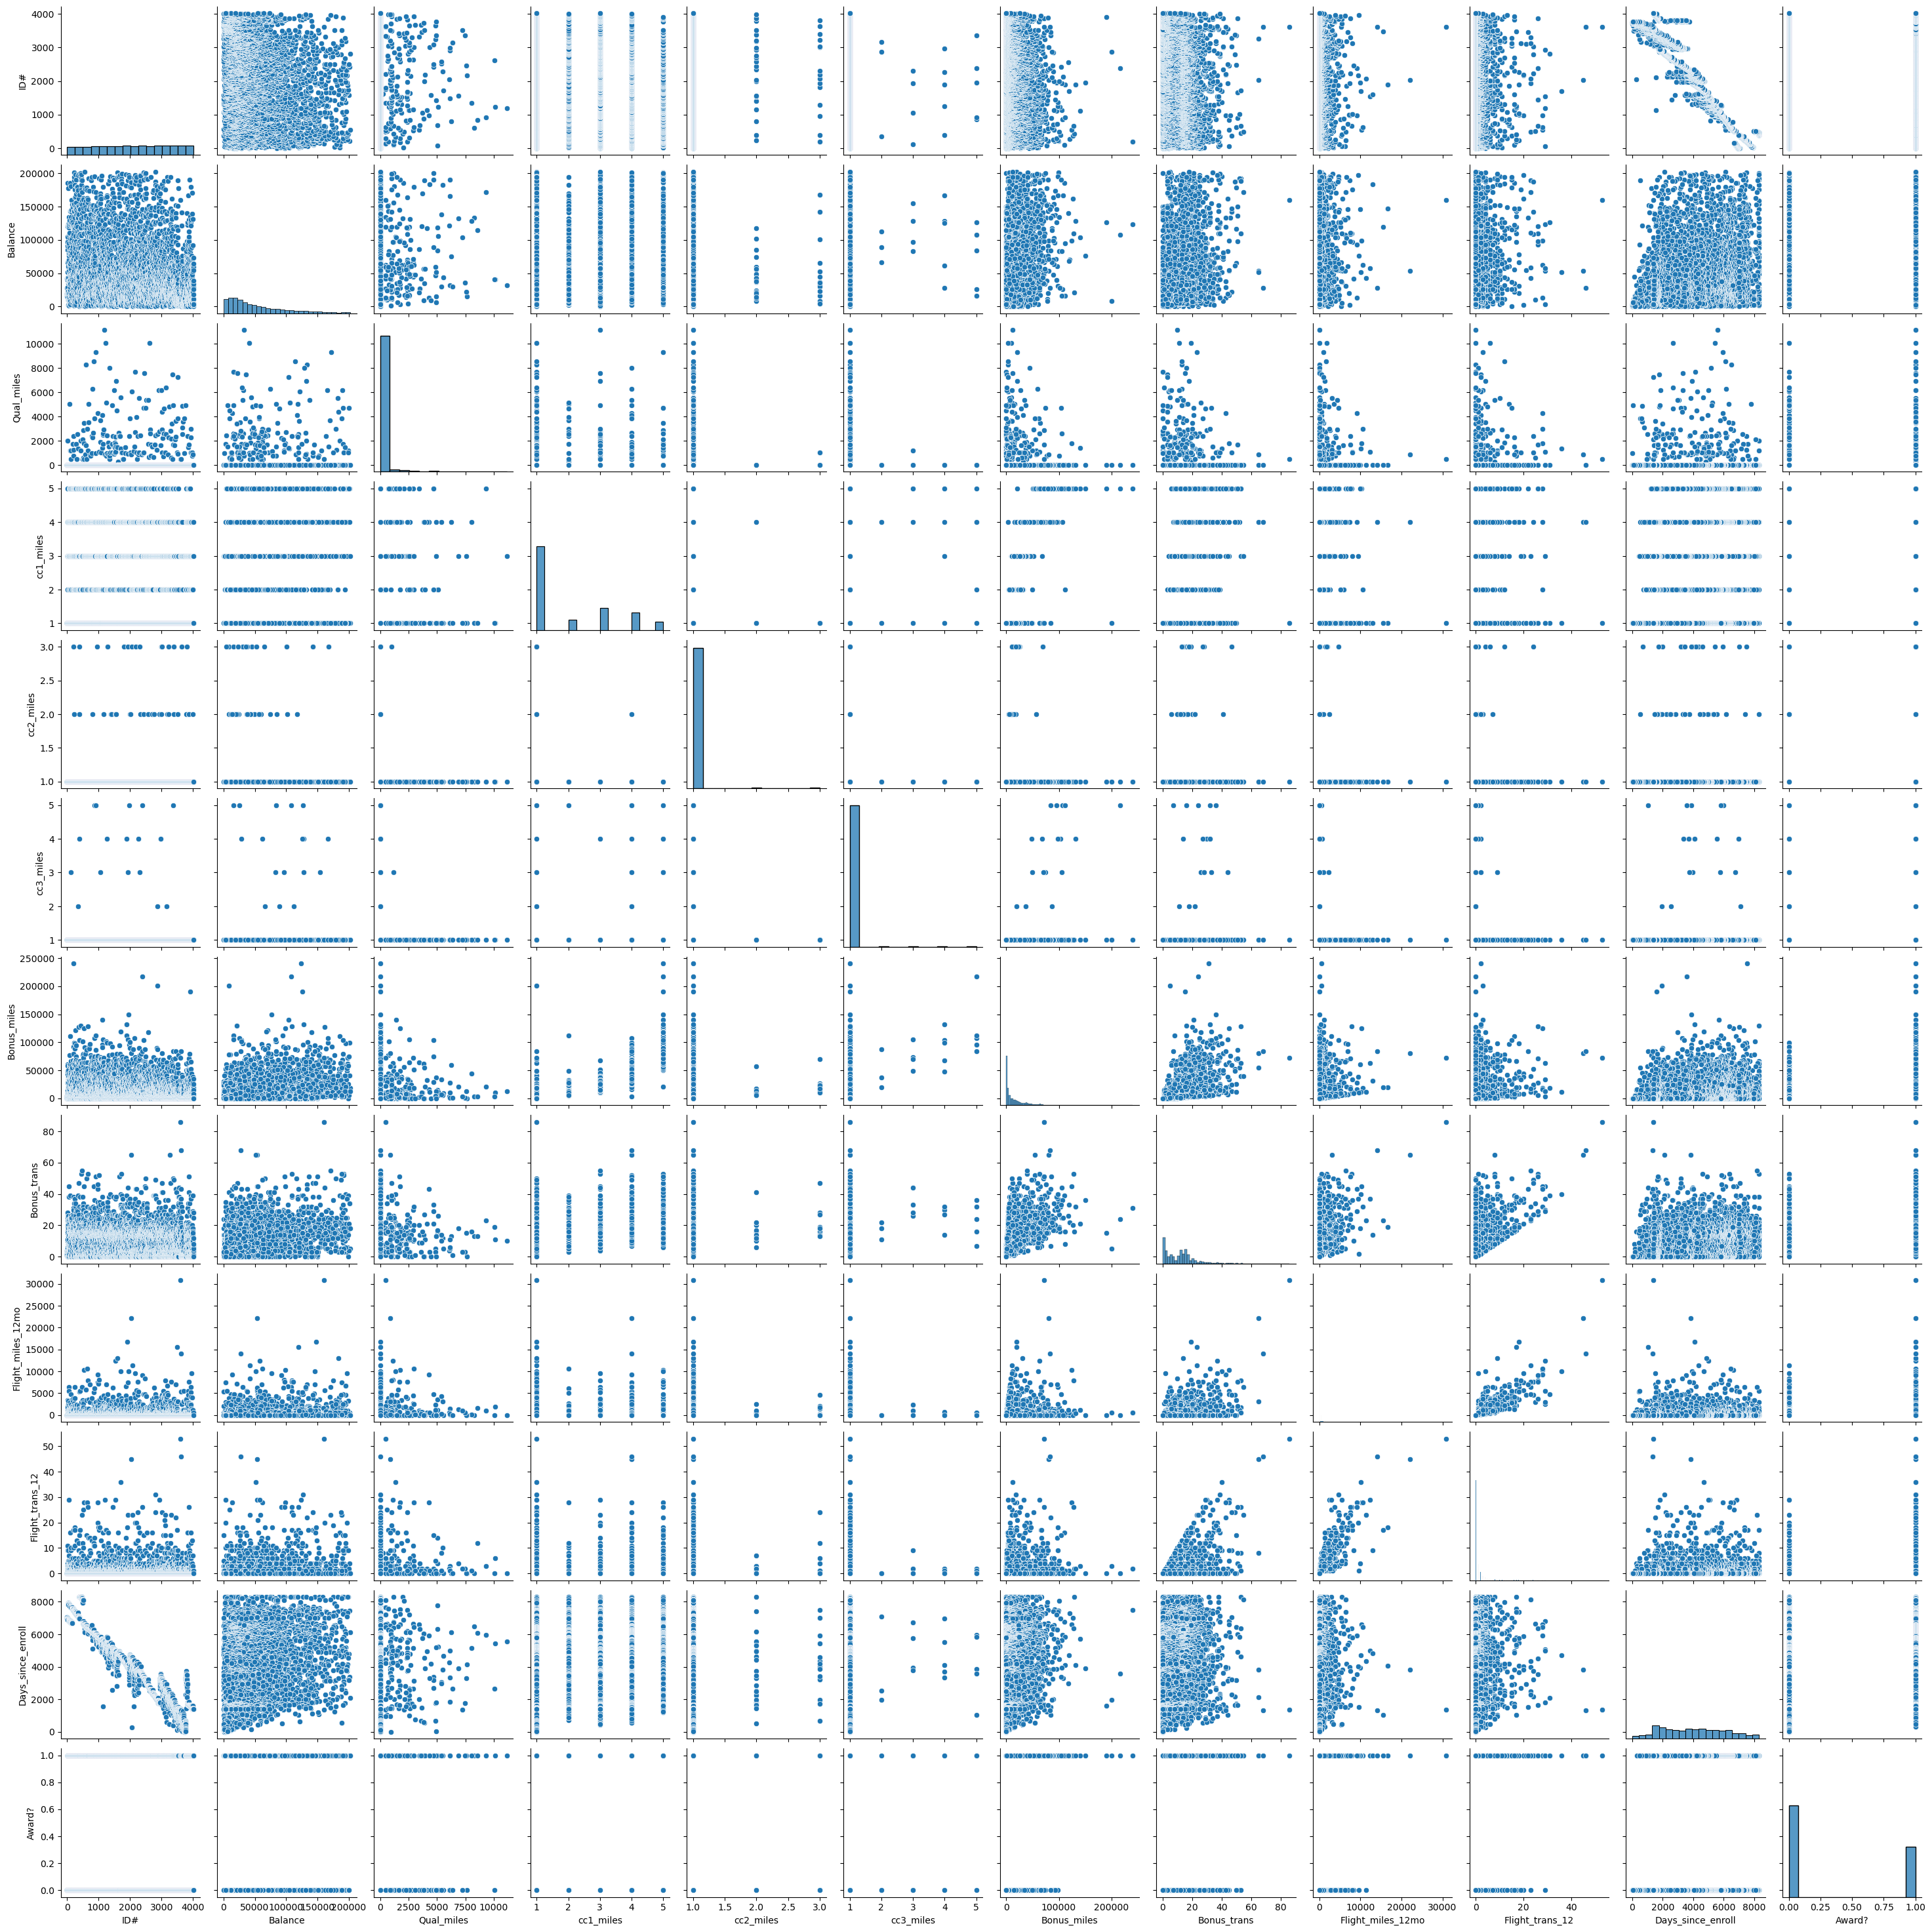

In [24]:
sns.pairplot(df)
plt.show()

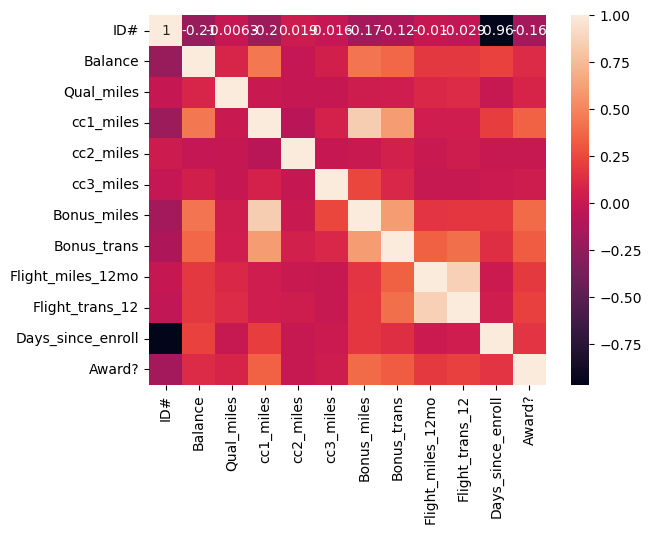

In [25]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [26]:
df.value_counts()

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?
1     28143    0           1          1          1          174          1            0                  0                7000               0         1
2759  73102    0           3          1          1          18156        20           0                  0                2272               1         1
2747  18545    0           3          1          1          25053        22           0                  0                2304               1         1
2748  5570     0           1          1          1          9094         26           0                  0                2287               1         1
2749  44690    0           3          1          1          24779        15           1000               2                2297               1         1
                                                                                       

In [27]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

## Implementing Clustering Algorithms:

In [31]:
from sklearn.cluster import KMeans

In [38]:
features= df.drop('ID#',axis=1)

In [39]:
kmeans=KMeans(n_clusters=3)
import warnings
warnings.filterwarnings('ignore')

In [40]:
cluster=kmeans.fit(features)

In [41]:
features

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [42]:
cluster.labels_

array([1, 1, 1, ..., 2, 2, 1])

In [43]:
np.unique(cluster.labels_)

array([0, 1, 2])

In [44]:
df['cluster']= cluster.labels_

In [45]:
df[df['cluster']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,2
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,2
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2


In [55]:
cluster.cluster_centers_

array([[1.45643263e+05, 2.83783582e+02, 3.00373134e+00, 1.00932836e+00,
        1.04104478e+00, 3.27982034e+04, 1.68973881e+01, 8.84505597e+02,
        2.55970149e+00, 4.83270522e+03, 4.73880597e-01],
       [2.11628195e+04, 9.52370546e+01, 1.40855107e+00, 1.01662708e+00,
        1.00000000e+00, 6.45401948e+03, 7.80332542e+00, 2.15073159e+02,
        6.76959620e-01, 3.64311544e+03, 2.91686461e-01],
       [7.17418159e+04, 1.24997253e+02, 2.60256410e+00, 1.01373626e+00,
        1.02197802e+00, 2.38606557e+04, 1.45467033e+01, 5.24058608e+02,
        1.50641026e+00, 4.33469505e+03, 4.14835165e-01]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

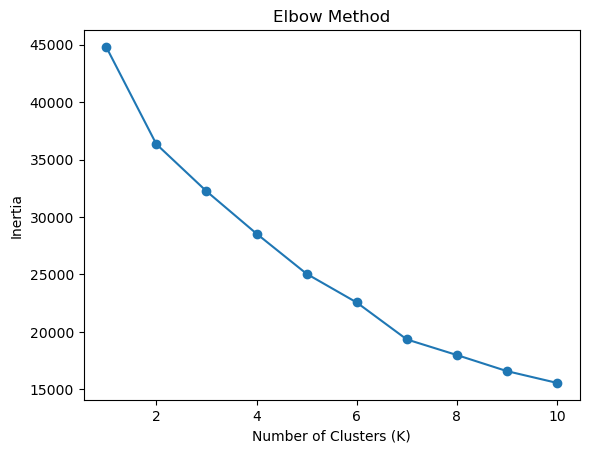

In [32]:
inertia_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_scores.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [33]:
## Choose the optimal K value based on the elbow curve and apply K-Means
k_optimal = 3  # Based on your observation from the elbow curve
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels_kmeans = kmeans.fit_predict(data_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
from sklearn.metrics import silhouette_score

In [57]:
silhouette_score(features,cluster.labels_)

0.5033389590221606

In [58]:
cluster.labels_

array([1, 1, 1, ..., 2, 2, 1])

## Hierarchical Clustering:

In [117]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [118]:
dendrogram= sch.dendrogram(sch.linkage(features,method='average'))
dendrogram

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [20.0, 20.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [80.0, 80.0, 111.25, 111.25],
  [36.25, 36.25, 95.625, 95.625],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [152.5, 152.5, 182.5, 182.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [252.5, 252.5, 282.5, 282.5],
  [305.0, 305.0, 315.0, 315.0],
  [267.5, 267.5, 310.0, 310.0],
  [213.75, 213.75, 288.75, 288.75],
  [167.5, 167.5, 251.25, 251.25],
  [325.0, 325.0, 335.0, 335.0],
  [365.0, 365.0, 375.0

In [119]:
linkage_methods = ['ward', 'average', 'complete']
for linkage_method in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)  # Adjust n_clusters as needed
    labels_hierarchical = hierarchical.fit_predict(df)
    # Evaluate and compare results

In [120]:
agg=AgglomerativeClustering(n_clusters=4,linkage='average')

In [121]:
agg.fit(features)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [122]:
agg.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
silhouette_score(features,agg.labels_)

0.773762882760906

## DBSCAN

In [124]:
from sklearn.cluster import DBSCAN

In [92]:
epsilon_values = [0.5, 1.0, 1.5]
minpts_values = [5, 10, 15]
for epsilon in epsilon_values:
    for minpts in minpts_values:
        dbscan = DBSCAN(eps=epsilon, min_samples=minpts)
        labels_dbscan = dbscan.fit_predict(data_scaled)
        # Evaluate and compare results

In [93]:
np.unique(cluster.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [125]:
silhouette_score(data_scaled,cluster.labels_)

-0.48343769118892377

In [126]:
output=[]
eps=[0.1,0.2,0.3,0.4,0.5,0.6]
min_nodes= range(1,11)
for ep in eps:
    for mn in min_nodes:
        labels= DBSCAN(eps=ep,min_samples=mn).fit(df_new).labels_
        score= silhouette_score(df_new,labels)
        output.append([ep,mn,score])
print(output)

[[0.1, 1, 0.033372566310622236], [0.1, 2, -0.3532421033449152], [0.1, 3, -0.3320546466832685], [0.1, 4, -0.33359366658012773], [0.1, 5, -0.3274798402577424], [0.1, 6, -0.3319058238676845], [0.1, 7, -0.29667899212066734], [0.1, 8, -0.13540197885879096], [0.1, 9, -0.08589862384913205], [0.1, 10, -0.08576141432735983], [0.2, 1, -0.07248515918476155], [0.2, 2, -0.5072984575236087], [0.2, 3, -0.43564745628125584], [0.2, 4, -0.3596823569867221], [0.2, 5, -0.3556567318243604], [0.2, 6, -0.35001839830150233], [0.2, 7, -0.3028635133400195], [0.2, 8, -0.29784030710191334], [0.2, 9, -0.25383278955725647], [0.2, 10, -0.27004737769077375], [0.3, 1, -0.14098239822459557], [0.3, 2, -0.5027168856914331], [0.3, 3, -0.5082741514455111], [0.3, 4, -0.48343769118892377], [0.3, 5, -0.3337626501286302], [0.3, 6, -0.3274229227251088], [0.3, 7, -0.35153435989561704], [0.3, 8, -0.272002183986777], [0.3, 9, -0.27457212929350516], [0.3, 10, -0.21505066384488328], [0.4, 1, -0.16064053050868934], [0.4, 2, -0.405679

In [127]:
sns.scatterplot(data=df_new,x='Flight_trans_12',y='Days_since_enroll',hue=labels)

<Axes: xlabel='Flight_trans_12', ylabel='Days_since_enroll'>

In [128]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

# Preprocess the data (assuming you've already handled missing values and outliers)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
labels_kmeans = kmeans.fit_predict(data_scaled)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Adjust linkage and number of clusters
labels_hierarchical = hierarchical.fit_predict(data_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust epsilon and min_samples
labels_dbscan = dbscan.fit_predict(data_scaled)

# Analyze the results
print("K-Means Cluster Labels:", labels_kmeans)
print("Hierarchical Cluster Labels:", labels_hierarchical)
print("DBSCAN Cluster Labels:", labels_dbscan)

# You can further analyze the clusters by examining the characteristics of data points within each cluster.
# For example, you could calculate the average values of different features for each cluster.

K-Means Cluster Labels: [1 1 1 ... 1 1 1]
Hierarchical Cluster Labels: [2 2 2 ... 1 1 2]
DBSCAN Cluster Labels: [ 0  0  0 ... -1 35  0]


In [104]:
# K-Means Cluster Analysis
cluster_centers = kmeans.cluster_centers_
print("K-Means Cluster Centers:")
print(cluster_centers)

# Analyze feature values for each cluster
for cluster_label in range(len(cluster_centers)):
    cluster_data = df[labels_kmeans == cluster_label]
    print(f"Cluster {cluster_label}:")
    print(cluster_data.describe())

# Hierarchical Cluster Analysis
# ... (similar analysis as K-Means)

# DBSCAN Cluster Analysis
# ... (analyze core points and density-based characteristics)

K-Means Cluster Centers:
[[-0.12953708  0.73898123  0.70402157  0.10559382  0.11328428 -0.06286429
   0.63928882  1.66787935  3.86329947  4.18083384  0.13766187  0.80353134
  -0.31819698]
 [ 0.24528967 -0.39112069 -0.05249996 -0.59767237  0.03968085 -0.06286429
  -0.51337694 -0.47592669 -0.1630188  -0.17678023 -0.25331283 -0.31702232
   0.00700286]
 [-0.45562895  0.67236655  0.02874349  1.13154426 -0.08735922  0.1265404
   0.9161632   0.73998514 -0.08131334 -0.08730386  0.47013672  0.52418395
   0.01897501]]
Cluster 0:
               ID#       Balance    Qual_miles   cc1_miles   cc2_miles  \
count   126.000000     126.00000    126.000000  126.000000  126.000000   
mean   1919.412698   88513.50000    656.293651    2.126984    1.031746   
std    1170.895700   57011.20383   1587.170741    1.485849    0.250966   
min      22.000000     231.00000      0.000000    1.000000    1.000000   
25%     895.500000   40867.50000      0.000000    1.000000    1.000000   
50%    1900.000000   78123.5000

K-Means: Clusters might be well-separated and have distinct characteristics based on the centroids.
    
Hierarchical Clustering: Clusters might exhibit a hierarchical structure, with some clusters being more closely related than others.
    
DBSCAN: Clusters might be based on density and may have irregular shapes or be more connected.

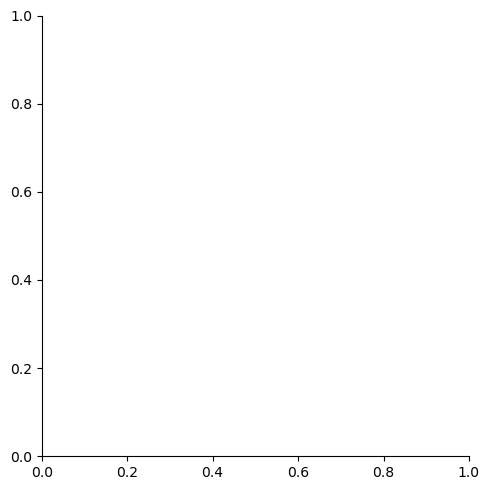

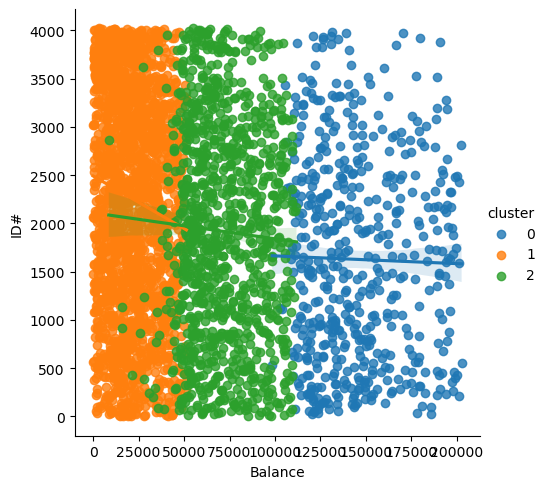

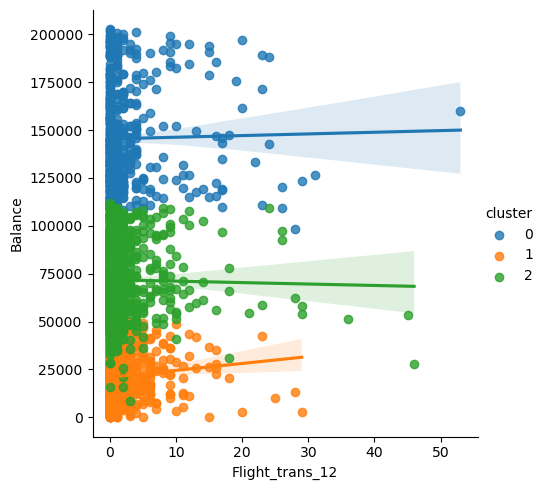

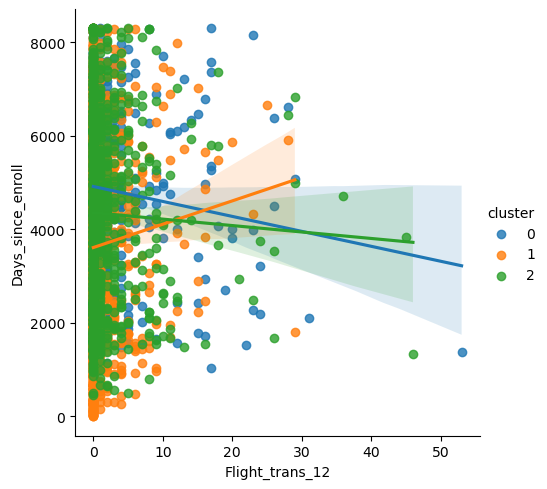

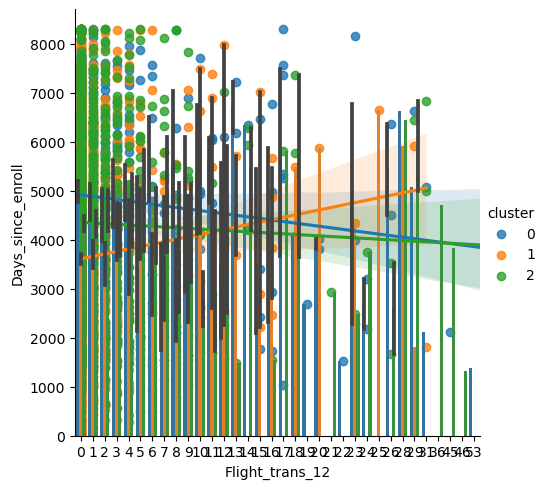

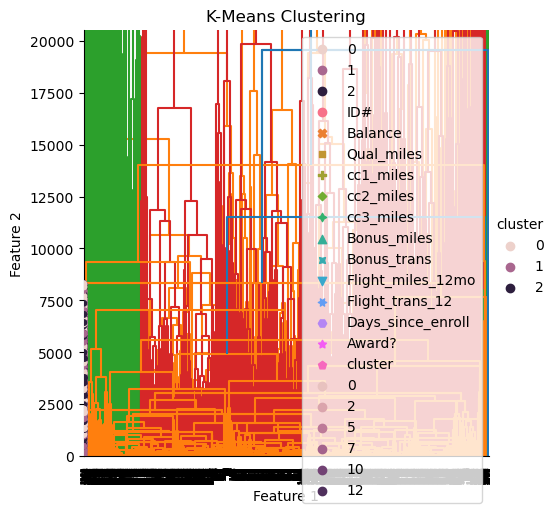

In [105]:
import matplotlib.pyplot as plt

# Assuming you have the data_scaled and labels_kmeans variables

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


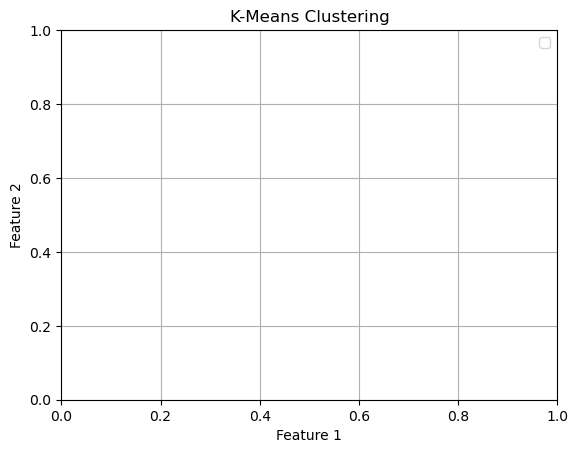

In [109]:
plt.title('K-Means Clustering')  # Add a title
plt.xlabel('Feature 1')  # Label the x-axis
plt.ylabel('Feature 2')  # Label the y-axis
plt.legend()  # Add a legend if using multiple colors for different clusters
plt.grid(True)  # Add grid lines for better readability
plt.show()  # Display the plot

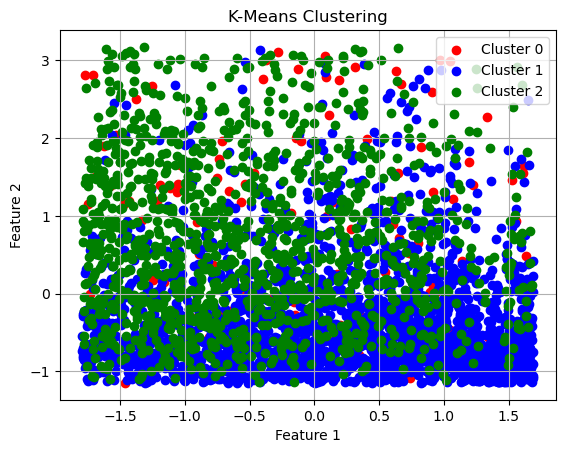

In [111]:
# Create scatter plots for each cluster with different colors
colors = ['red', 'blue', 'green']  # Adjust colors as needed
for i in range(len(cluster_centers)):
    cluster_data = data_scaled[labels_kmeans == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label=f'Cluster {i}')

# Add legend
plt.legend()

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.grid(True)
plt.ylabel('Feature 2')
plt.show()

In [112]:
silhouette_kmeans = silhouette_score(data_scaled, labels_kmeans)
silhouette_dbscan = silhouette_score(data_scaled, labels_dbscan)

print("Silhouette Score for K-Means:", silhouette_kmeans)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)

Silhouette Score for K-Means: 0.26260366592643636
Silhouette Score for DBSCAN: -0.3615001971435944


silhouette Score of KMeans has slightly better than DBSCAN

A]Higher silhouette score: Indicates better clustering quality.
    
B]Negative silhouette score: Suggests potential misclassification.
    
C]Silhouette analysis plot: Visualizes the distribution of silhouette coefficients for each data point.